## Проект интернет магазин

### Постановка задачи и цель работы
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### 1 Шаг, Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/Users/marksuskov/ЯП/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можно увидеть, что в некоторых столбцах присуствуют нулевые значения. В некоторых столбцах неправильные типы данных

#### 2 Шаг. Предобработка данных

Заменю названия столбцов (приведу к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразую данные в нужные типы

In [5]:
data['year_of_release'] =  pd.to_datetime(data['year_of_release'],format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year
data
#только с месяцем и днем смог сделать формат date, если делать через DatetimeIndex(), то формат другой

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


преобразую столбец user_score в float, для этого разберусь со значениями tbd

In [6]:
#data['user_score'] = data['user_score'].astype('float')
print(data['user_score'].value_counts())
(data[data['user_score'] == 'tbd']).head(30)

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


как можно увидеть у всех этих игр довольно низкая популярность, в Японии так вообще ни одной продажи. Не буду удалять эти строки, так как они занимают больше 10% всего датафрейма. tbd - значит не определено, заменю на 0

In [7]:
#data = ((data[data['user_score'] == 'tbd']))
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

In [8]:
data['user_score'] = data['user_score'].astype('float')
pd.options.mode.chained_assignment = None

Обработка пропусков

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
data = data[data['name'].isnull()==False]
data['name'].isnull().sum()

0

Строки где рейтинги неизвестны не буду удалять, так как они не помешают в наблюдениях 

Проанализирую пропуски в year_of_release

In [11]:
#data['year_of_release'].isnull()
#display(data[data['year_of_release'].isnull()==True])

Можно заменить все пропуски медианным значением из строк с той же платформой, тогда получил приблизительно похожыие результаты, или можно удалить эти строки из таблицы, выберу второй вариант

In [12]:
data = data[data['year_of_release'].isnull()==False]
data['year_of_release'].isnull().sum()

0

Все пропуски были проработаны. Пропуски в столбце name связаны с человеческим фактором. Так как это самая важная ячейка в анализе. Пропуски в годе также непонятно с чем связаны. Пропуски в столбцах с рейтингаи возможно свяаны с небольшим количесвтом оценок от пользователей 

Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [13]:
data
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проработаю дубликаты:

In [14]:
data[data.duplicated ()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sales              0
dtype: int64

Дубликатов нет

В ходе предобрабоки данных были заменены имена столбцов в нижний регистр, была проведена работа с пропусками и были удалены строки с пропусками в name и year_of_release, проанализированы строки с tbd в user_score и эти строки были удалены

#### 3 Шаг. Исследовательский анализ данных

Рассмотрю, сколько игр выпускалось в разные годы:

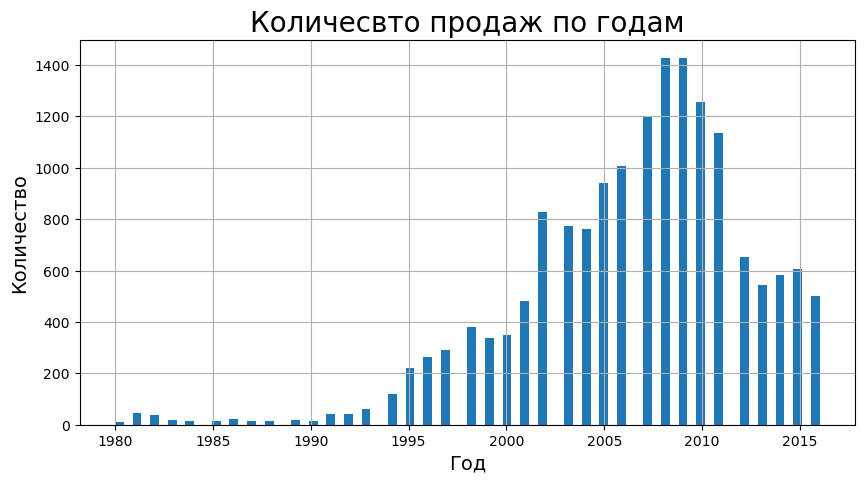

In [15]:
data['year_of_release'].value_counts()
data['year_of_release'].hist(figsize = (10,5),bins = 80)
plt.title('Количесвто продаж по годам',fontdict = {'fontsize' : 20})
plt.xlabel('Год',fontdict = {'fontsize' : 14})
plt.ylabel('Количество',fontdict = {'fontsize' : 14})
plt.show()

на этом графике хорошо видно в какой год сколько игр покупалось. Можно увидеть, что свой пик продажа игр достигла в 2008 году

Посмотрю, как менялись продажи по платформам. Выберу платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [16]:
print(data['platform'].value_counts())
data_platform_count = data.pivot_table(index = ['platform','year_of_release'],values = 'sales',aggfunc ='count')
data_platform_count

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


sales
platform year_of_release       
2600     1980.0               9
         1981.0              46
         1982.0              36
         1983.0              11
         1984.0               1
...                         ...
XB       2008.0               1
XOne     2013.0              19
         2014.0              61
         2015.0              80
         2016.0              87

[238 rows x 1 columns]

In [17]:
#исследую самые популярные платформы
data_platform_count = data_platform_count.reset_index()
data_platform_count = data_platform_count.query('(platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "PC" or platform == "DS" or platform == "X360" or platform == "PS4") and year_of_release>2013')
data_platform_count


,platform,year_of_release,sales
116,PC,2014.0,47
117,PC,2015.0,50
118,PC,2016.0,54
150,PS3,2014.0,108
151,PS3,2015.0,73
152,PS3,2016.0,38
154,PS4,2014.0,75
155,PS4,2015.0,137
156,PS4,2016.0,164
222,X360,2014.0,63


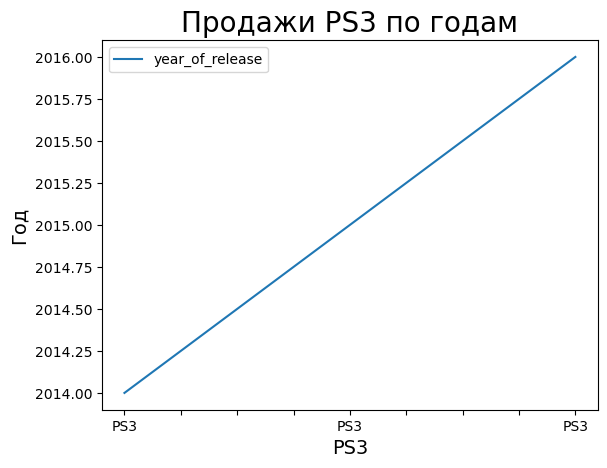

In [18]:
data_platform_count.query('platform == "PS3"').plot(x = 'platform',y='year_of_release',kind = 'line')
plt.title('Продажи PS3 по годам',fontdict = {'fontsize' : 20})
plt.xlabel('PS3',fontdict = {'fontsize' : 14})
plt.ylabel('Год',fontdict = {'fontsize' : 14})
plt.show()

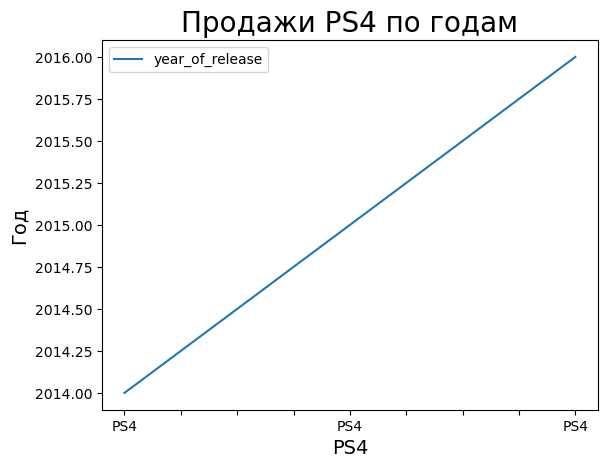

In [19]:
data_platform_count.query('platform == "PS4"').plot(x = 'platform',y='year_of_release',kind = 'line')
plt.title('Продажи PS4 по годам',fontdict = {'fontsize' : 20})
plt.xlabel('PS4',fontdict = {'fontsize' : 14})
plt.ylabel('Год',fontdict = {'fontsize' : 14})
plt.show()

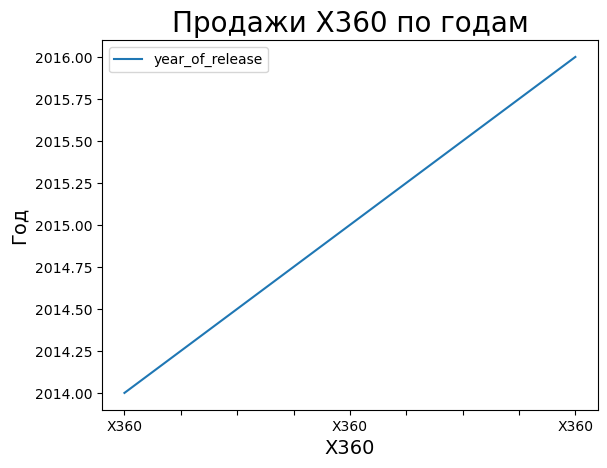

In [20]:
data_platform_count.query('platform == "X360"').plot(x = 'platform',y='year_of_release',kind = 'line')
plt.title('Продажи X360 по годам',fontdict = {'fontsize' : 20})
plt.xlabel('X360',fontdict = {'fontsize' : 14})
plt.ylabel('Год',fontdict = {'fontsize' : 14})
#plt.ylim(2013,2017)
plt.show()

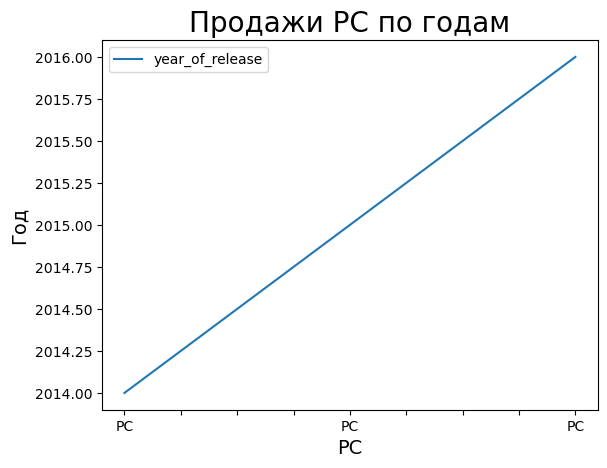

In [21]:
data_platform_count.query('platform == "PC"').plot(x = 'platform',y='year_of_release',kind = 'line')
plt.title('Продажи PC по годам',fontdict = {'fontsize' : 20})
plt.xlabel('PC',fontdict = {'fontsize' : 14})
plt.ylabel('Год',fontdict = {'fontsize' : 14})
#plt.ylim(2013,2017)
plt.show()

Для наглядности были выбраны самые популярные в датасете платформы, а также вся линейка консолей PS. Можно увидеть что с выходом новых консолей постепенно поднимается и их популярность, тем временем пк популярен всегда


Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Судя по графику "Количесвто продаж по годам" количестов проданных игр будет примерно как в 2016. По графику 'Самые популярные платформы и годы популярности игр на них' можно отметить, что продолжится рост популярности на современные консоли, такие как ps4 и начнут уходить такие консоли как ps3 x360

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

PS2     1891;
DS      1377;
PS3     1219;
X360    1149;
PS      1146. Это самые популярные консоли в датасете с 1984

По графикам видно, что новые консоли будут расти по отношению к старым. Для потдвержения посмотрю список самых популярных платформ за 2016

In [22]:
data_16_year = data[data['year_of_release'] == 2016]
data_16_year['platform'].value_counts()

platform
PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: count, dtype: int64

По показателям за 2016 год можно удтвердиться в прошлых наблюдениях, тут лидируют ps4,xone,psv в то время как PS2, которая лидер во всей таблице, в 2016 году отсуствует. Такая тенденция будет продолжаться и в 2017

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

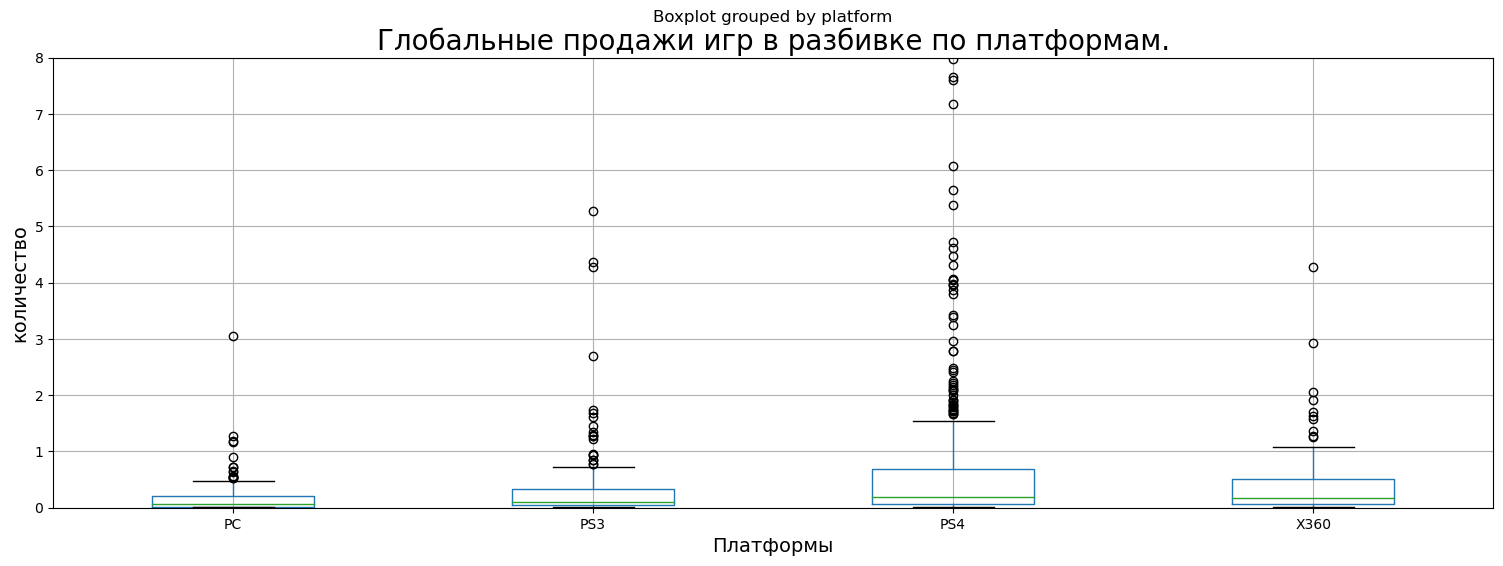

In [23]:
data_popular_platform = data.query('(platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "PC" or platform == "DS" or platform == "X360" or platform == "PS4") and year_of_release>2013')
data_popular_platform.boxplot(column = 'sales',by = 'platform',figsize = (18,6))
plt.title('Глобальные продажи игр в разбивке по платформам.',fontdict = {'fontsize' : 20})
plt.xlabel('Платформы',fontdict = {'fontsize' : 14})
plt.ylabel('количество',fontdict = {'fontsize' : 14})
plt.ylim(0,8)
plt.show()

По графику мы еще раз можем увидеть популряность плафторм 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Посмотрю на примере ps3

0.19996195715548157


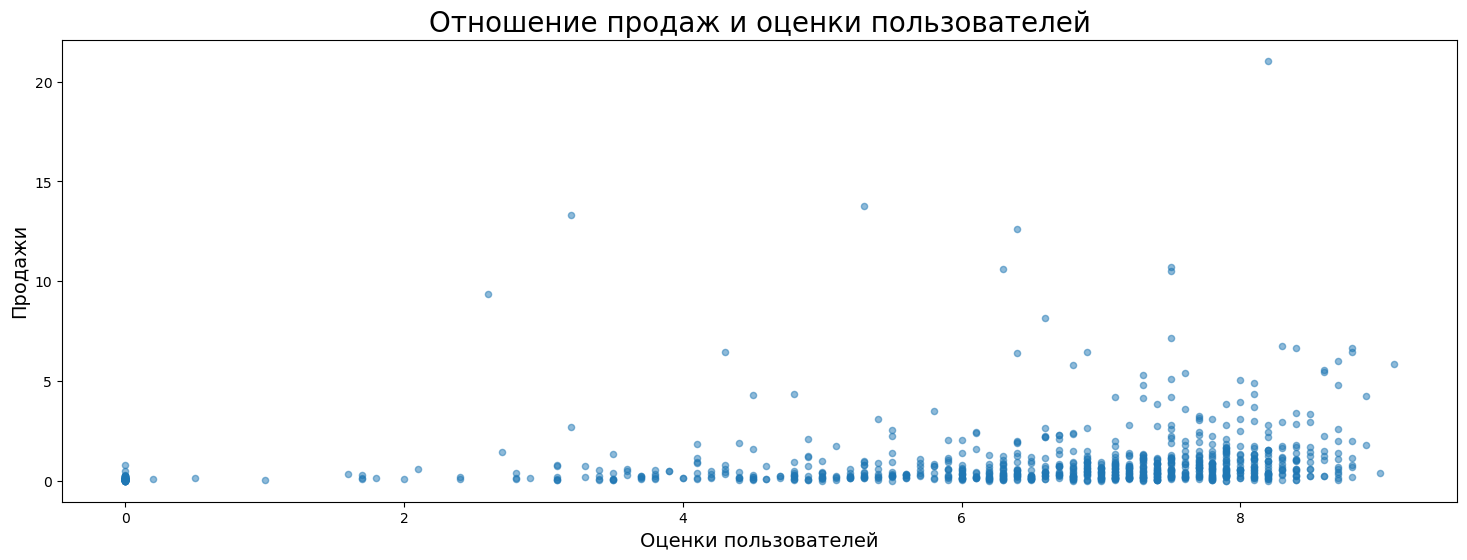

In [24]:
data_ps3 = data[data['platform'] == 'PS3']
data_ps3
print(data_ps3['sales'].corr(data_ps3['user_score']))
data_ps3.plot(x = 'user_score',y='sales',kind = 'scatter',alpha = 0.5,figsize = (18,6))
plt.title('Отношение продаж и оценки пользователей',fontdict = {'fontsize' : 20})
plt.xlabel('Оценки пользователей',fontdict = {'fontsize' : 14})
plt.ylabel('Продажи',fontdict = {'fontsize' : 14})
plt.show()

Отзывы пользователей почти не влияют на продажи, но все же немного больше продаж у игр с болшьими баллами

0.43275895789971397


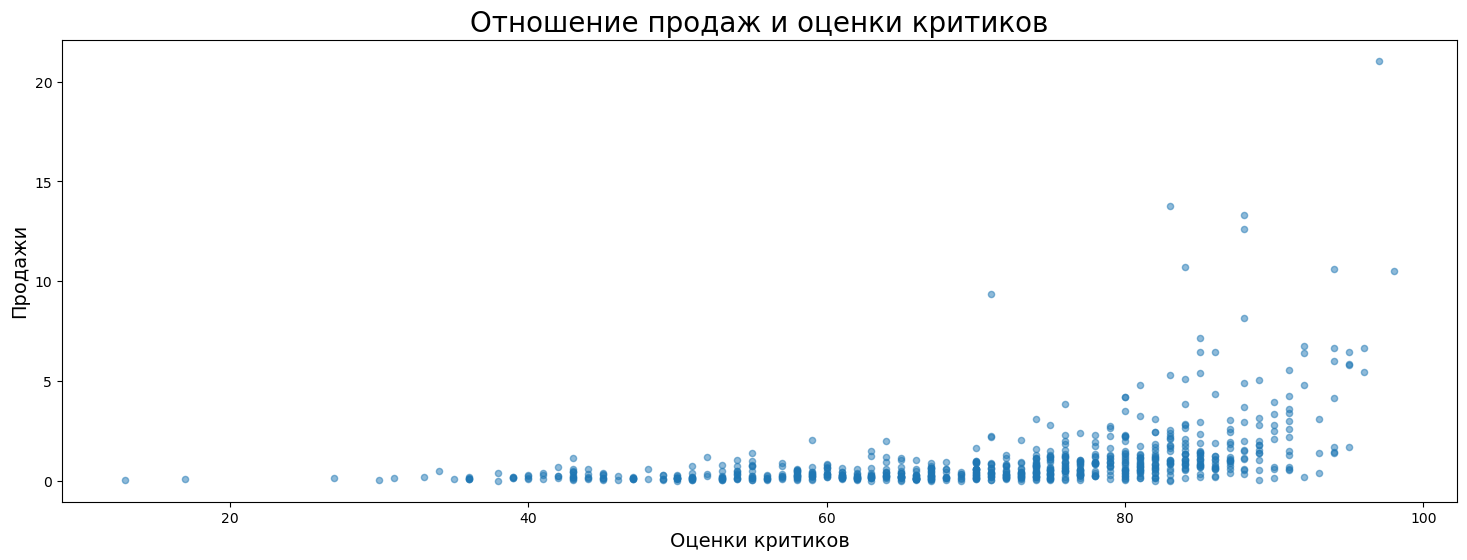

In [25]:
print(data_ps3['sales'].corr(data_ps3['critic_score']))
data_ps3.plot(x = 'critic_score',y='sales',kind = 'scatter',alpha = 0.5,figsize = (18,6))
plt.title('Отношение продаж и оценки критиков',fontdict = {'fontsize' : 20})
plt.xlabel('Оценки критиков',fontdict = {'fontsize' : 14})
plt.ylabel('Продажи',fontdict = {'fontsize' : 14})
plt.show()

как можно заметить, оценки критиков больше зависит на продажи чем оценки пользователей

Соотнесите выводы с продажами игр на других платформах. Проверю эту тендению с другой платформой:

0.0626278007914455


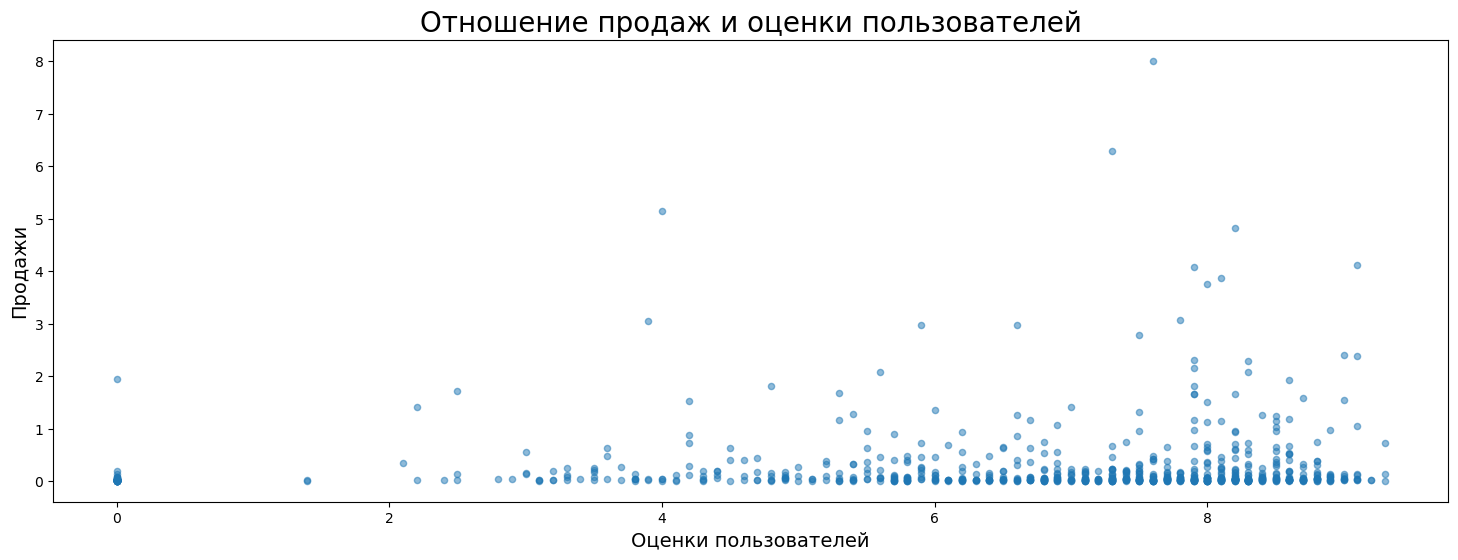

In [26]:
data_pc = data[data['platform'] == 'PC']
data_pc
print(data_pc['sales'].corr(data_pc['user_score']))
data_pc.plot(x = 'user_score',y='sales',kind = 'scatter',alpha = 0.5,figsize = (18,6))
plt.title('Отношение продаж и оценки пользователей',fontdict = {'fontsize' : 20})
plt.xlabel('Оценки пользователей',fontdict = {'fontsize' : 14})
plt.ylabel('Продажи',fontdict = {'fontsize' : 14})
plt.show()

0.2573947184009853


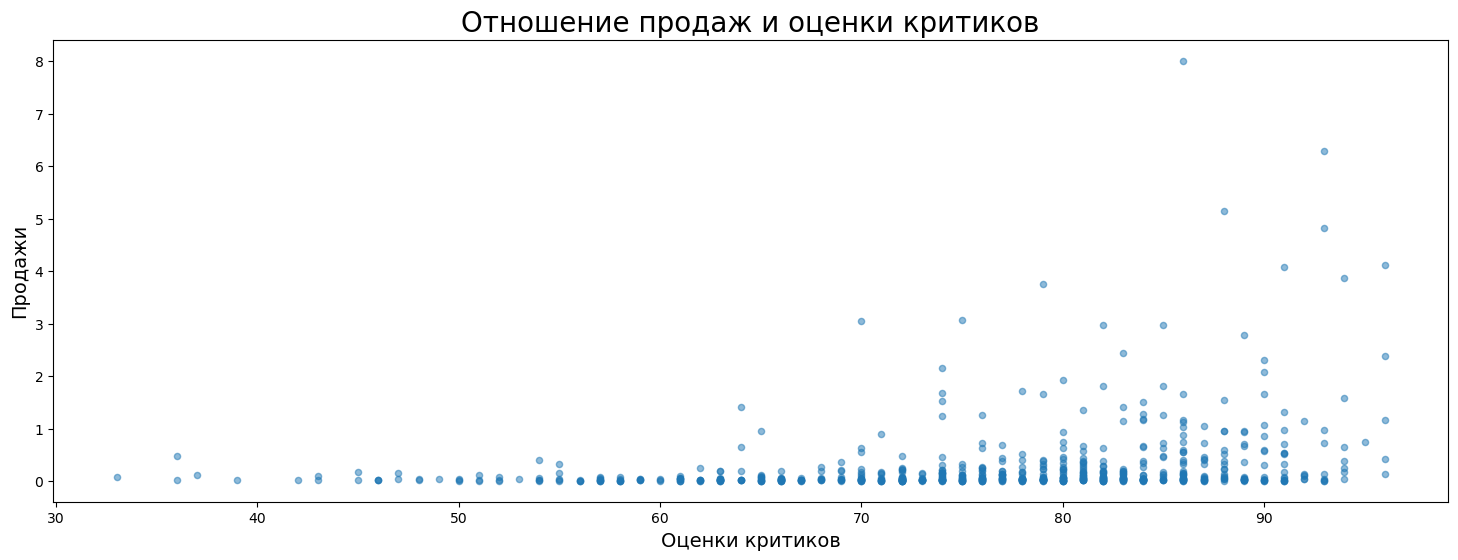

In [27]:
print(data_pc['sales'].corr(data_pc['critic_score']))
data_pc.plot(x = 'critic_score',y='sales',kind = 'scatter',alpha = 0.5,figsize = (18,6))
plt.title('Отношение продаж и оценки критиков',fontdict = {'fontsize' : 20})
plt.xlabel('Оценки критиков',fontdict = {'fontsize' : 14})
plt.ylabel('Продажи',fontdict = {'fontsize' : 14})
plt.show()

Как мы видим на ПК еще меньше зависят оценки на продажи, оценки пользователей тут вообще не влияют

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,sales
genre,
Action,0.519057
Adventure,0.180456
Fighting,0.528865
Misc,0.459204
Platform,0.940262
Puzzle,0.421599
Racing,0.590122
Role-Playing,0.628683
Shooter,0.803519


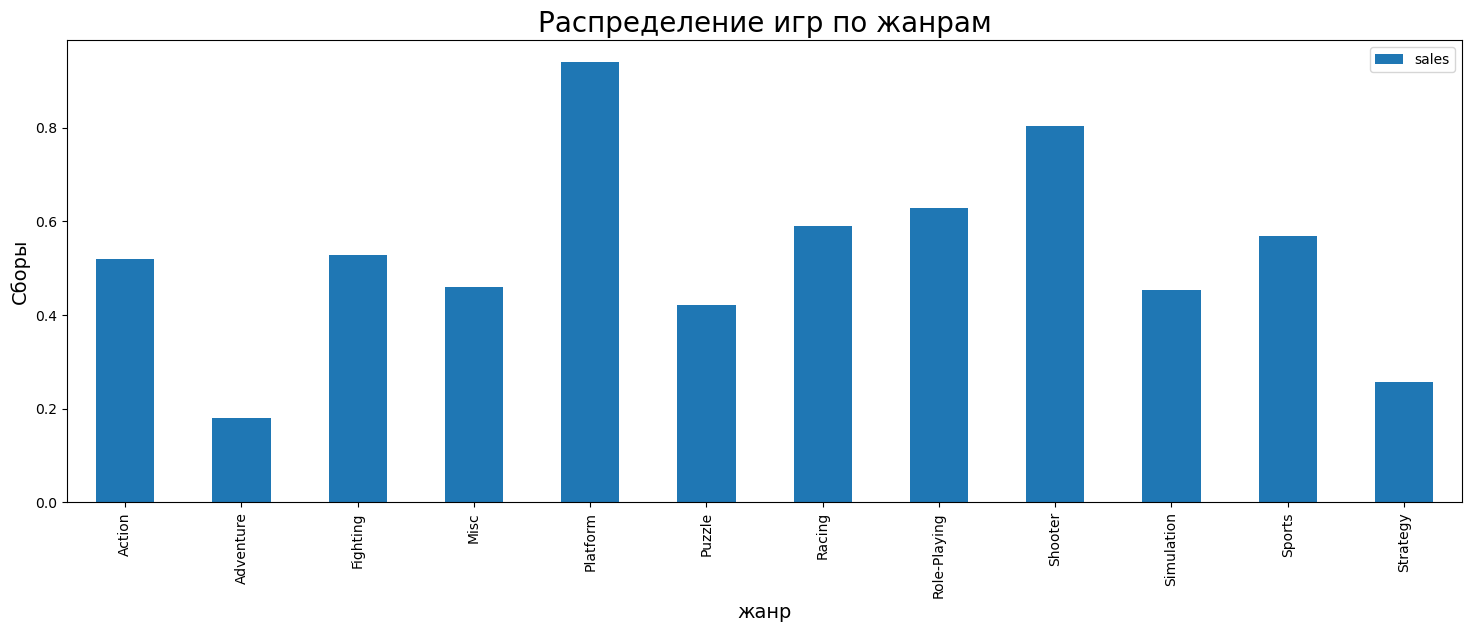

In [28]:
data_genre = data.pivot_table(index = 'genre',values = 'sales',aggfunc = 'mean')
display(data_genre)
data_genre.plot(kind = 'bar',figsize = (18,6))
plt.title('Распределение игр по жанрам',fontdict = {'fontsize' : 20})
plt.xlabel('жанр',fontdict = {'fontsize' : 14})
plt.ylabel('Сборы',fontdict = {'fontsize' : 14})
plt.show()

Самые популярные жанры это Action,Adventure,Fighting; Самые непопулярные: Sports Strategy

В ходе анализа данных было проанализировано множесто зависимостей: пик продажа игр достигла в 2008 году; Можно увидеть что с выходом новых консолей постепенно пожнимается и их популярность, тем временем пк популярен всегда, По показателям за 2016 год можно удтвердиться в прошлых наблюдениях, тут лидируют ps4,xone,psv в то время как PS2, которая лидер во всей таблице, в 2016 году отсуствует. Такая тенденция будет продолжаться и в 2017; Отзывы пользователей почти не влияют на продажи, Отзывы критиков влияют немного больше; Самые популярные жанры это Action,Adventure,Fighting; Самые непопулярные: Sports Strategy

#### 4 Шаг. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5)

In [29]:
data_platform_na = data.pivot_table(index = 'platform',values = 'na_sales',aggfunc = 'sum')
display(data_platform_na.sort_values(by = 'na_sales',ascending = False).head(5))

data_platform_eu = data.pivot_table(index = 'platform',values = 'eu_sales',aggfunc = 'sum')
display(data_platform_eu.sort_values(by = 'eu_sales',ascending = False).head(5))

data_platform_jp = data.pivot_table(index = 'platform',values = 'jp_sales',aggfunc = 'sum')
display(data_platform_jp.sort_values(by = 'jp_sales',ascending = False).head(5))

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


,eu_sales
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
PS,212.39


,jp_sales
platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
3DS,100.62


Можно заметить, что x360 очень популярен в Северной Америке и Европе, но не популярен в Японии, что логично, потому что японцы больше поддерживают своих производителей 

In [30]:
data_genre_na = data.pivot_table(index = 'genre',values = 'na_sales',aggfunc = 'sum')
display(data_genre_na.sort_values(by = 'na_sales',ascending = False).head(5))

data_genre_eu = data.pivot_table(index = 'genre',values = 'eu_sales',aggfunc = 'sum')
display(data_genre_eu.sort_values(by = 'eu_sales',ascending = False).head(5))

data_genre_jp = data.pivot_table(index = 'genre',values = 'jp_sales',aggfunc = 'sum')
display(data_genre_jp.sort_values(by = 'jp_sales',ascending = False).head(5))

,na_sales
genre,
Action,863.17
Sports,671.20
Shooter,584.83
Platform,444.44
Misc,399.57


,eu_sales
genre,
Action,510.99
Sports,371.33
Shooter,314.52
Racing,234.49
Misc,210.60


,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,134.93
Platform,130.71
Misc,107.02


В Северной Америке и Европы опять похожы результаты, в Японии же на первое место вырываются ролевые игры

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [31]:
#Составлю общую табдицу на продажи по регионам и esrb
data_rating = data.pivot_table(index = 'rating',values = ['na_sales','eu_sales','jp_sales'],aggfunc = 'sum')
data_rating =data_rating.reset_index()
data_rating

,rating,eu_sales,jp_sales,na_sales
0,AO,0.61,0.00,1.26
1,E,703.87,197.96,1274.24
2,E10+,183.35,40.20,345.50
3,EC,0.11,0.00,1.53
4,K-A,0.27,1.46,2.56
5,M,480.00,63.58,742.89
6,RP,0.03,0.00,0.00
7,T,421.79,150.70,747.60


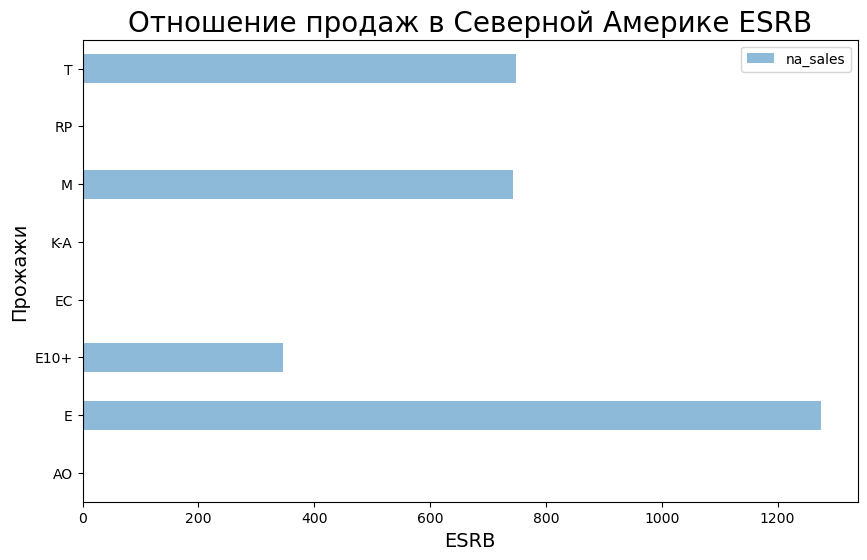

In [32]:
#print(data_rating['na_sales'].corr(data_rating['rating']))
data_rating.plot(x = 'rating',y='na_sales',kind = 'barh',alpha = 0.5,figsize = (10,6))
plt.title('Отношение продаж в Северной Америке ESRB',fontdict = {'fontsize' : 20})
plt.xlabel('ESRB',fontdict = {'fontsize' : 14})
plt.ylabel('Прожажи',fontdict = {'fontsize' : 14})
plt.show()

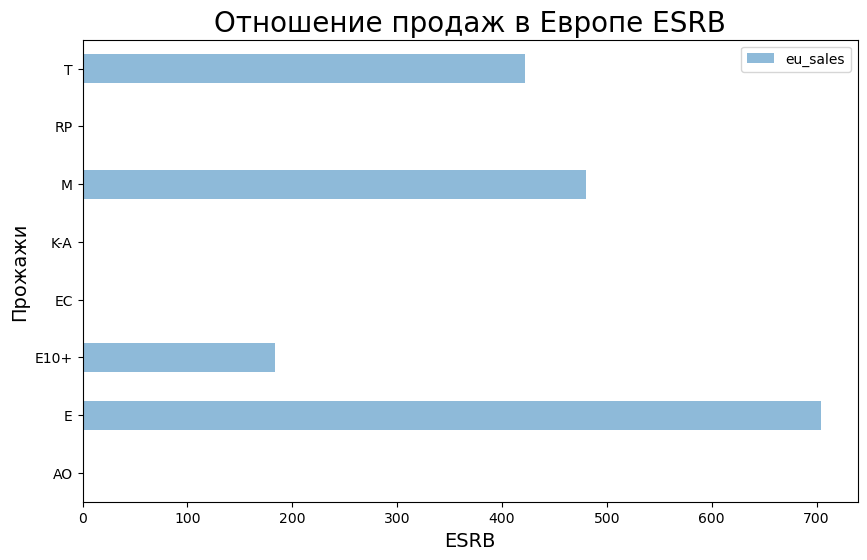

In [33]:
data_rating.plot(x = 'rating',y='eu_sales',kind = 'barh',alpha = 0.5,figsize = (10,6))
plt.title('Отношение продаж в Европе ESRB',fontdict = {'fontsize' : 20})
plt.xlabel('ESRB',fontdict = {'fontsize' : 14})
plt.ylabel('Прожажи',fontdict = {'fontsize' : 14})
plt.show()

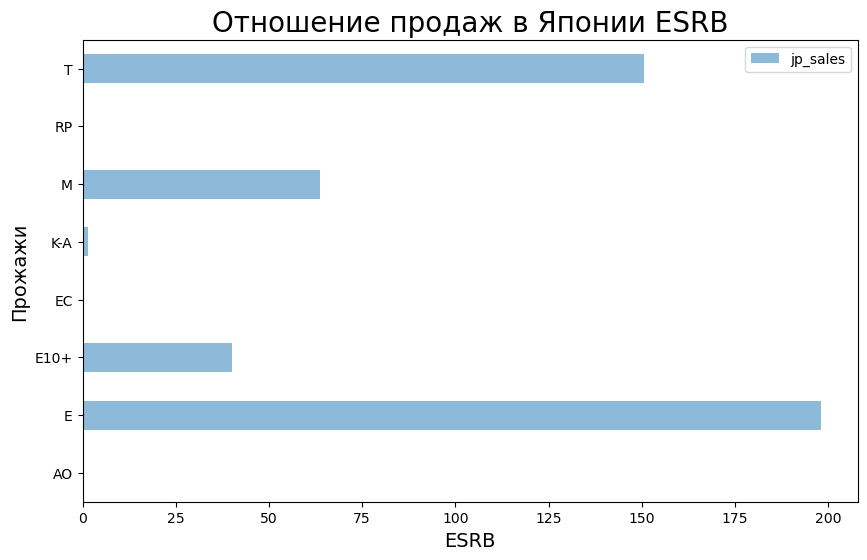

In [34]:
data_rating.plot(x = 'rating',y='jp_sales',kind = 'barh',alpha = 0.5,figsize = (10,6))
plt.title('Отношение продаж в Японии ESRB',fontdict = {'fontsize' : 20})
plt.xlabel('ESRB',fontdict = {'fontsize' : 14})
plt.ylabel('Прожажи',fontdict = {'fontsize' : 14})
plt.show()

В Европе и Америке снова видны одинаковые результаты, явно лидирует рейтинги E,M,T. В Японии не так популярен рейтинг M.
Рейтинг ESRB влияет на популярность игры

В ходе составления портрета пользователя каждого региона можно увидеть, что регион Европа и Северная Америка очень похожи между собой и по популярным жанрам: Action, Sports, Shooter; и по консолям X360, PS2, Wii, PS3; Япония отличается тут из жанров выделяются: Role-Playing, Action, Sports; из платформ: DS, PS, PS2; Также и в рейтинге ESRB В Европе и Америке явно лидирует рейтинги E,M,T. В Японии не так популярен рейтинг M. Рейтинг ESRB влияет на популярность игр

#### 5 Шаг Проверка гипотез

нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная: Средние пользовательские рейтинги платформ Xbox On не равно PC

In [35]:
#создам таблицу с платформами и средним значением пользовательского рейтинга 
#удалю пропуски в user_score для гипотез
data_user_notnull = data[data['user_score'].isnull()==False]
data_xbox = data_user_notnull[data_user_notnull['platform'] == 'XOne']
data_pc = data_user_notnull[data_user_notnull['platform'] == 'PC']


In [36]:
alpha = .05
results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.006207707506247993
Отвергаем нулевую гипотезу


In [37]:
#проверю на ген совокупности
data_mean_rating = data_user_notnull.pivot_table(index = 'platform',values = 'user_score',aggfunc = 'mean')
data_mean_rating = data_mean_rating.reset_index()
data_mean_rating
Xbox_On = data_mean_rating[data_mean_rating['platform'] == 'XOne']
PC_mean = data_mean_rating[data_mean_rating['platform'] == 'PC']
print(PC_mean)
Xbox_On

  platform  user_score
5       PC    6.635323


,platform,user_score
16,XOne,6.149741


 Средние пользовательские рейтинги платформ Xbox One и PC примерно равны

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Нулевая гипотеза средние пользовательские рейтинги жанров Action и Sports равны.
алтернативная на равны

In [38]:
data_action = data_user_notnull[data_user_notnull['genre'] == 'Action']
data_sports = data_user_notnull[data_user_notnull['genre'] == 'Sports']

In [39]:
alpha = .05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 3.513886479422392e-14
Отвергаем нулевую гипотезу


проверю ген совокупность

In [40]:
print(data_action['user_score'].mean())
data_sports['user_score'].mean()

5.857855822550832


5.053463349024882

практически равны

После гипотез можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports равны.
 Средние пользовательские рейтинги платформ Xbox One и PC примерно равны

### Общий вывод

Подводя итог всей работы было выполнено:
- Предобработка данных: В ходе предобрабоки данных были заменены имена столбцов в нижний регистр, была проведена работа с пропусками и были удалены строки с пропусками в name и year_of_release, проанализированы строки с tbd в user_score заменены 0
- Исследовательский анализ данных: В ходе анализа данных было проанализировано множесто зависимостей: пик продажа игр достигла в 2008 году; Можно увидеть что с выходом новых консолей постепенно пожнимается и их популярность, тем временем пк популярен всегда, По показателям за 2016 год можно удтвердиться в прошлых наблюдениях, тут лидируют ps4,xone,psv в то время как PS2, которая лидер во всей таблице, в 2016 году отсуствует. Такая тенденция будет продолжаться и в 2017; Отзывы пользователей почти не влияют на продажи, Отзывы критиков влияют немного больше; Самые популярные жанры это Action,Adventure,Fighting; Самые непопулярные: Sports Strategy
- Проверка гипотез: После гипотез можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports равны. Средние пользовательские рейтинги платформ Xbox One и PC примерно равны
    
Нужно обратить внимание на популярные по продажам и заработку жанры, а также выбрать те жанры, которые популярны во всех регионах. Не стоит забывать про платформы, которые с каждым годом заменяют друг друга. На 2017 год точно нужно сделать акцент на ps4, pc, xone